## Библиотеки


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math
import seaborn as sb
#import pingouin as pg
import statsmodels.api as sm
from scipy.stats import kstest
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import sklearn
from sklearn.cluster import KMeans

#%matplotlib notebook

## Загрузка данных



In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston['MEDV'] = boston_dataset.target
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Разведочный анализ данных

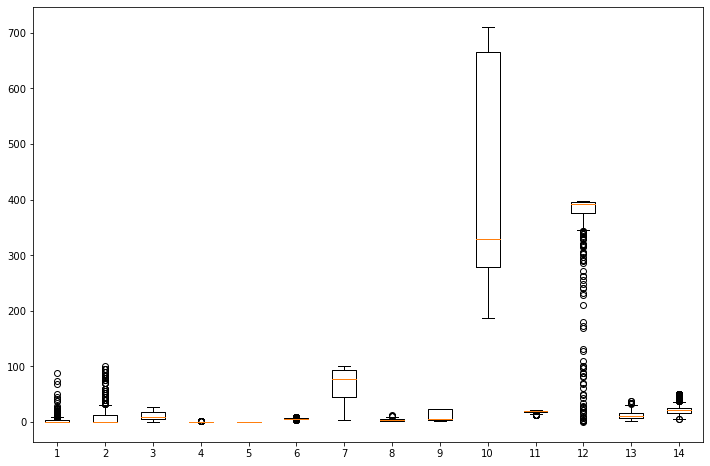

In [58]:
# Диаграмма тьюки
plt.figure(figsize=(12, 8))
plt.boxplot(x=boston);

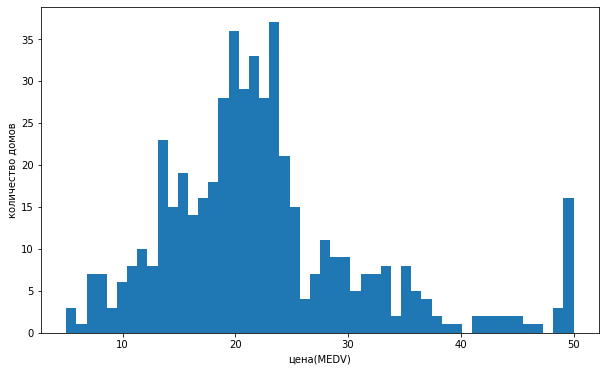

In [60]:
#Визуализация
plt.figure(figsize=(10,6))
plt.hist(boston['MEDV'],bins=50)
plt.xlabel("цена(MEDV)")
plt.ylabel("количество домов")
plt.show()

In [5]:
# Тест Колмагорова-Смирнова
for i,columns in enumerate(boston):
    Kol_Sm=kstest(boston[columns],'norm')
    if Kol_Sm[1] > 0.05:
        print('{} pvalue= {}. нормальное распределение'.format(boston.columns[i],Kol_Sm[1]))
    else:
        print('Для столбца {} pvalue= {}. не нормальное распределение.'.format(boston.columns[i],Kol_Sm[1]))


Для столбца CRIM pvalue= 9.101764614072096e-119. не нормальное распределение.
Для столбца ZN pvalue= 1.6871111181943794e-117. не нормальное распределение.
Для столбца INDUS pvalue= 0.0. не нормальное распределение.
Для столбца CHAS pvalue= 1.6871111181943794e-117. не нормальное распределение.
Для столбца NOX pvalue= 2.7133228490861893e-209. не нормальное распределение.
Для столбца RM pvalue= 0.0. не нормальное распределение.
Для столбца AGE pvalue= 0.0. не нормальное распределение.
Для столбца DIS pvalue= 0.0. не нормальное распределение.
Для столбца RAD pvalue= 0.0. не нормальное распределение.
Для столбца TAX pvalue= 0.0. не нормальное распределение.
Для столбца PTRATIO pvalue= 0.0. не нормальное распределение.
Для столбца B pvalue= 0.0. не нормальное распределение.
Для столбца LSTAT pvalue= 0.0. не нормальное распределение.
Для столбца MEDV pvalue= 0.0. не нормальное распределение.


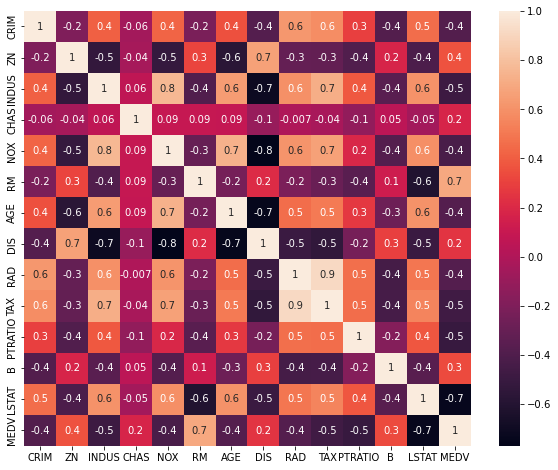

In [6]:
#Парная кореляция
plt.figure(figsize=(10, 8))
Partial_Corr=boston.corr()
sb.heatmap(Partial_Corr,annot=True, fmt='.1g')
plt.show()

# Визуализация


In [32]:
# plt.scatter(boston['MEDV'],boston['RM'])
# plt.title("Зависимость цены от количества комнат (кор=0.7)")
# plt.xlabel("цена(MEDV)")
# plt.ylabel("количество комнат(RM)")
# plt.show()
# plt.scatter(boston['MEDV'],boston['DIS'])
# plt.title("Зависимость цены от расстояния до центра (кор=0.2)")
# plt.xlabel("цена(MEDV)")
# plt.ylabel("расстояние до центра(DIST)")
# plt.show()
# plt.scatter(boston['MEDV'],boston['LSTAT'])
# plt.title("Зависимость цены от статуса населения (кор=-0.7)")
# plt.xlabel("цена(MEDV)")
# plt.ylabel("% более низкого статуса населения(LSTAT)")
# plt.show()
# plt.scatter(boston['MEDV'],boston['CRIM'])
# plt.title("Зависимость цены от уровня приступности (кор=-0.4)")
# plt.xlabel("цена(MEDV)")
# plt.ylabel("уровень приступности(CRIM)")
# plt.show()

# Регрисионный анализ исходных данных

In [36]:
#Стантартизация и нормализация
X = boston.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].values
scaler =StandardScaler()   
scaler.fit(X)
scaled_data = scaler.transform(X) 
boston_s=pd.DataFrame(scaled_data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTTRATIO','B','LSTAT','MEDV'])
boston_s.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [65]:
# тестовая и обучающая выборка
X_mnoz = boston_s.drop('MEDV', axis=1)
Y_mnoz = boston_s['MEDV']  
x_train, x_test, y_train, y_test = train_test_split(X_mnoz, Y_mnoz, test_size=0.3, random_state=0)  
model = LinearRegression()
model.fit(x_train,y_train)

print('Детерминация для тренировочных = ', model.score(x_train, y_train))
print('Детерминация для тестовых = ', model.score(x_test,y_test)) 


pd.DataFrame(data=model.coef_,index=x_train.columns,columns=['coef'])


Детерминация для тренировочных =  0.7645451026942549
Детерминация для тестовых =  0.6733825506400195


,coef
CRIM,-0.113455
ZN,0.112760
INDUS,0.008460
CHAS,0.069352
NOX,-0.204503
RM,0.294815
AGE,-0.030561
DIS,-0.343492
RAD,0.229247
TAX,-0.202888


In [38]:
# Значимость коэффициентов регресии
pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})

,coef,p-value
const,37.937108,0.000
CRIM,-0.121310,0.002
ZN,0.044466,0.005
INDUS,0.011342,0.868
CHAS,2.511246,0.014
NOX,-16.231253,0.000
RM,3.859068,0.000
AGE,-0.009985,0.527
DIS,-1.500270,0.000
RAD,0.242143,0.002


C:\Users\vanin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


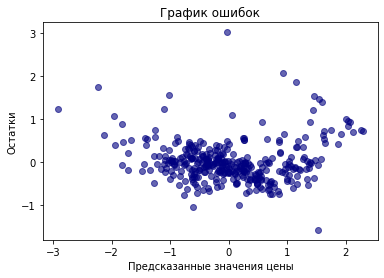

Тест Колмагорова-Смирнова
Для остатков pvalue= 9.321589276693538e-16. не нормальное распределение.


In [66]:
# остатки

X_incl = sm.add_constant(x_train)
model5 = sm.OLS(y_train, X_incl)
results = model5.fit()

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.title("График ошибок")
plt.xlabel("Предсказанные значения цены")
plt.ylabel("Остатки")
plt.show()

print('Тест Колмагорова-Смирнова')
#проверка на нормальность распределения остков
Kol_Sm=kstest(results.resid,'norm')
if Kol_Sm[1] > 0.05:
    print('Для остатвов pvalue= {}. нормальное распределение'.format(Kol_Sm[1]))
else:
    print('Для остатков pvalue= {}. не нормальное распределение.'.format(Kol_Sm[1]))


# Регрессионный анализ в лог

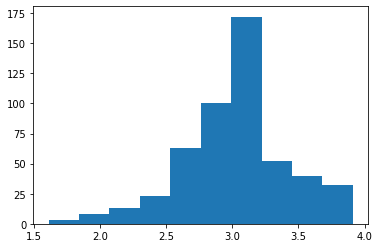

In [45]:
Y_log=np.log(boston['MEDV'])
plt.hist(Y_log)
plt.show()

In [49]:

x_train, x_test, y_train, y_test = train_test_split(X_mnoz, Y_log, test_size=0.3)  
model1 = LinearRegression()
model1.fit(x_train,y_train)

print('Детерминация для тренировочных = ', model1.score(x_train, y_train))
print('Детерминация для тестовых = ', model1.score(x_test,y_test)) 


pd.DataFrame(data=model.coef_,index=x_train.columns,columns=['coef'])

Детерминация для тренировочных =  0.7938571354875444
Детерминация для тестовых =  0.7667660693214109


,coef
CRIM,-0.121310
ZN,0.044466
INDUS,0.011342
CHAS,2.511246
NOX,-16.231253
RM,3.859068
AGE,-0.009985
DIS,-1.500270
RAD,0.242143
TAX,-0.011072


In [51]:
# Значимость коэффициентов регресии
pd.DataFrame({'coef':results.params,'p-value':round(results.pvalues,3)})

,coef,p-value
const,4.158957,0.000
CRIM,-0.010637,0.000
ZN,0.001863,0.010
INDUS,0.003533,0.238
CHAS,0.104609,0.008
NOX,-0.899953,0.000
RM,0.091071,0.000
AGE,0.000526,0.405
DIS,-0.054315,0.000
RAD,0.016294,0.000


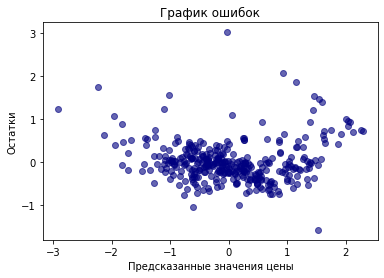

Тест Колмагоровва-Смирнова
Для остатков pvalue= 9.321589276693538e-16. не нормальное распределение.


In [67]:
# остатки

X_incl = sm.add_constant(x_train)
model5 = sm.OLS(y_train, X_incl)
results = model5.fit()

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.title("График ошибок")
plt.xlabel("Предсказанные значения цены")
plt.ylabel("Остатки")
plt.show()

print('Тест Колмагоровва-Смирнова')
#проверка на нормальность распределения остков
Kol_Sm=kstest(results.resid,'norm')
if Kol_Sm[1] > 0.05:
    print('Для остатвов pvalue= {}. нормальное распределение'.format(Kol_Sm[1]))
else:
    print('Для остатков pvalue= {}. не нормальное распределение.'.format(Kol_Sm[1]))

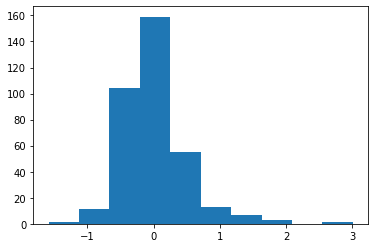

In [68]:

plt.hist(results.resid)
plt.show()

# Кластеризация

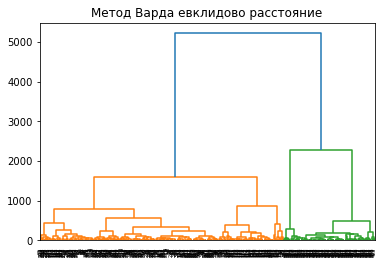

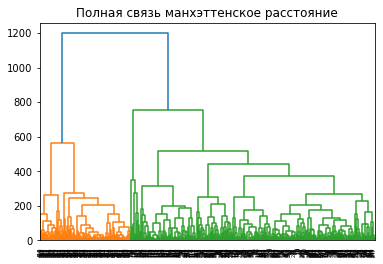

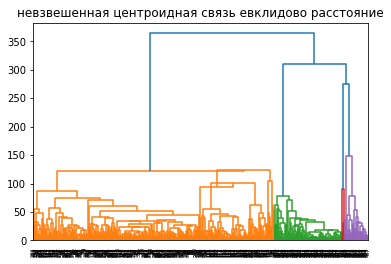

In [12]:
#дендограммы
dendrogram=sch.dendrogram(sch.linkage(boston,method='ward',metric='euclidean'))
plt.title("Метод Варда евклидово расстояние")
plt.show()

dendrogram=sch.dendrogram(sch.linkage(boston,method='complete',metric='cityblock'))
plt.title("Полная связь манхэттенское расстояние")
plt.show()

dendrogram=sch.dendrogram(sch.linkage(boston,method='centroid',metric='euclidean'))
plt.title("невзвешенная центроидная связь евклидово расстояние")
plt.show()

explained_variance  [0.46757068 0.11782371 0.09635042 0.06332428 0.06077853 0.04714363
 0.03824363 0.02879118 0.01980454 0.01801839 0.0151993  0.01307054
 0.00957212 0.00430905]


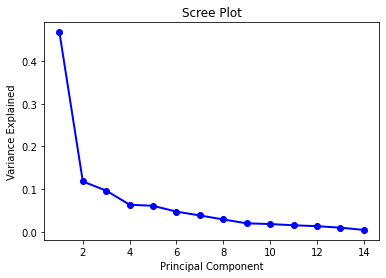

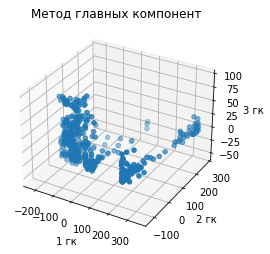

In [14]:
#Метод главных компонент
X = boston.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]].values

scaler =StandardScaler()   
scaler.fit(X)
scaled_data = scaler.transform(X)  

pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_      
print('explained_variance ', explained_variance)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


pca = PCA(n_components = 3)
XPCAreduced = pca.fit_transform(X)
XPCAreduced=np.transpose(XPCAreduced)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(XPCAreduced[0],XPCAreduced[1],XPCAreduced[2])
plt.title('Метод главных компонент')
ax.set_xlabel('1 гк')
ax.set_ylabel('2 гк') 
ax.set_zlabel('3 гк')
plt.show()


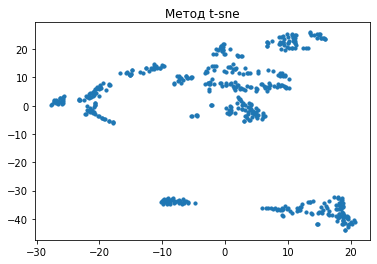

In [54]:
#стохастическое вложение соседей с t-распределением 
embed = TSNE(random_state=0)
X_embedded = embed.fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=10)
plt.title('Метод t-sne')
plt.show()

## KMEANS


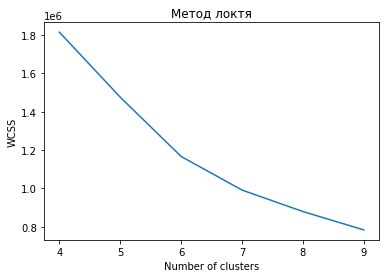

In [55]:
# метод локтя для k-means
wcss=[]
for i in range(4,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(4,10),wcss)
plt.title('Метод локтя')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

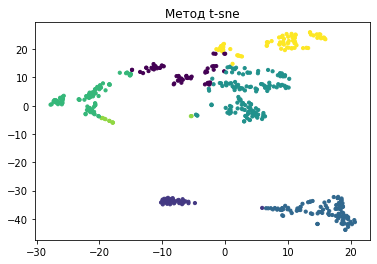

In [70]:
kmeans=KMeans(n_clusters=7)
y_kmeans=kmeans.fit_predict(X)

embed1 = TSNE(random_state=0)
X_embedded = embed.fit_transform(X)

plt.scatter(X_embedded[:,0],X_embedded[:,1],s=10, c=y_kmeans)
plt.title('Метод t-sne')
plt.show()


# Классицикация


In [52]:
boston.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

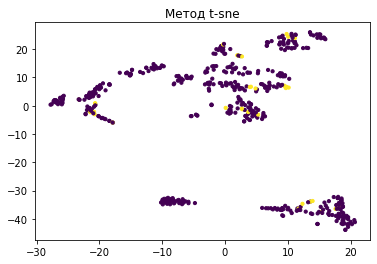

In [53]:
embed = TSNE(random_state=0)
X_embedded = embed.fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=10, c = boston.CHAS)
plt.title('Метод t-sne')
plt.show()